<a href="https://colab.research.google.com/github/marcelounb/BB/blob/master/ia_mobile2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
path = "/content/fulldataset.xlsx"

# Importing using pandas

In [4]:
dataset = pd.read_excel(path, sheet_name=0, header=0 )

# Just extract out sentences and labels first - we will create subwords here
automatico = dataset['Responsável'].tolist()
negocial = dataset['Natureza'].tolist()
classificacao = dataset['Classificação'].tolist()
produtos_servicos = dataset['Produtos/Serviços'].tolist()
detalhamento = dataset['Detalhamento'].tolist()
review = dataset['review'].tolist()
score = dataset['score'].tolist()

In [5]:
dataset.keys()

Index(['Responsável', 'Natureza', 'Classificação', 'Produtos/Serviços',
       'Detalhamento', 'Descrição do Problema', 'Produtos/Serviços 2',
       'Detalhamento 2', 'Descrição do Problema 2', 'Produtos/Serviços 3',
       'Detalhamento 3', 'Descrição do Problema 3', 'id', 'userName',
       'userImage', 'review', 'score', 'thumbsUpCount', 'appVersion', 'date',
       'reply', 'replyDate'],
      dtype='object')

In [6]:
review[0:5]

['O aplicativo possibilita fazer todas as movimentações e acompanhar seu andamento. È fàcil de utilizar, ràpido e possue todas as informações necessàrias ao cliente.',
 'Bom',
 'Muito bom, gosto muito',
 'Muito bom',
 'Muito bom tem me ajudado muito pois faço tudo sem precisar sair de casa👏👏👏👏👏']

# Reduzindo o texto (retirando artigos)

In [30]:
def reduzir_texto(frases):
  frase = ''
  for item in frases.lower().split():
    if not (item=='a' or item=='o' or item=='as' or item=='os' or item=='e' or item==',' or item=='.' or item==';'):
      frase +=str(item)+' '
  return frase[:-1]

In [31]:
review_reduzida = []
for item in review:
  review_reduzida.append(reduzir_texto(item))

In [32]:
review[0:5]

['O aplicativo possibilita fazer todas as movimentações e acompanhar seu andamento. È fàcil de utilizar, ràpido e possue todas as informações necessàrias ao cliente.',
 'Bom',
 'Muito bom, gosto muito',
 'Muito bom',
 'Muito bom tem me ajudado muito pois faço tudo sem precisar sair de casa👏👏👏👏👏']

In [33]:
review_reduzida[0:5]

['aplicativo possibilita fazer todas movimentações acompanhar seu andamento. è fàcil de utilizar, ràpido possue todas informações necessàrias ao cliente.',
 'bom',
 'muito bom, gosto muito',
 'muito bom',
 'muito bom tem me ajudado muito pois faço tudo sem precisar sair de casa👏👏👏👏👏']

In [12]:
total, max, i = 0, 0, 0
def calcula(totalreview)
  for item in totalreview:
    total += len(item)
    i+=1
    if len(item)> max:
      max = len(item)
  

In [13]:
media = total/i
print("Tamanho Médio dos reviews = " + str(media))
print("Maior review = " + str(max) + " caracteres")

Tamanho Médio dos reviews = 43.18304431599229
Maior review = 1074 caracteres


In [14]:
tamanhoreviews_lista = []
for item in range(max+1):
  tamanhoreviews_lista.append(0)
len(tamanhoreviews_lista)

1075

In [15]:
for item in review:
  tamanhoreviews_lista[len(item)]+=1

In [16]:
tamanhoreviews_lista = pd.DataFrame(tamanhoreviews_lista, columns=['Tamanho das Reviews'])
tamanhoreviews_lista.keys()

Index(['Tamanho das Reviews'], dtype='object')

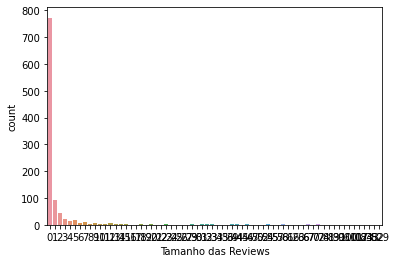

In [17]:
sns.countplot(x='Tamanho das Reviews', data=tamanhoreviews_lista, )

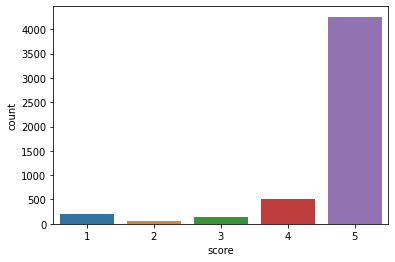

In [18]:
sns.countplot(x = 'score', data=dataset)

# Cleaning the data

In [19]:
dataset2 = dataset.drop(['Responsável', 'Descrição do Problema', 'Produtos/Serviços 2',
                        'Detalhamento 2', 'Descrição do Problema 2', 'Produtos/Serviços 3',
                        'Detalhamento 3', 'Descrição do Problema 3', 'id', 'userName',
                        'userImage','thumbsUpCount', 'appVersion', 'date','reply', 'replyDate'], axis=1)

In [20]:
dataset2.head(20)

,Natureza,Classificação,Produtos/Serviços,Detalhamento,review,score
0,Opinião,Elogio,Aplicativo,NaN,O aplicativo possibilita fazer todas as movime...,5
1,Opinião,Elogio,Aplicativo,NaN,Bom,1
2,Opinião,Elogio,Aplicativo,NaN,"Muito bom, gosto muito",5
3,Opinião,Elogio,Aplicativo,NaN,Muito bom,4
4,Opinião,Elogio,Aplicativo,NaN,Muito bom tem me ajudado muito pois faço tudo ...,5
5,Negocial,Elogio,Aplicativo,Usabilidade,"Ótima, interface muito amigável e simples",5
6,Opinião,Elogio,Aplicativo,NaN,Bom,5
7,Opinião,Elogio,Aplicativo,NaN,Muito bom,5
8,Opinião,Elogio,Aplicativo,NaN,Otima,5
9,Opinião,Elogio,Aplicativo,NaN,Estou satisfeita,5
